In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv('Mobile.csv')

In [50]:
df.head()

,SI No,Name,Type,Number,Call Type,Time,Duration,Duration(Seconds),Time2,Hour,Month,Day of Week
0,1,NaN,NaN,+918075648554,Incoming,2/6/19 15:14,1m 1s,61,2019-02-06 15:14:00,15,2,Wed
1,2,NaN,NaN,+918075648554,Outgoing,2/6/19 15:13,0 sec,0,2019-02-06 15:13:00,15,2,Wed
2,3,NaN,NaN,+918075648554,Outgoing,2/6/19 15:11,0 sec,0,2019-02-06 15:11:00,15,2,Wed
3,4,NaN,NaN,+918075648554,Missed,2/6/19 15:09,0 sec,0,2019-02-06 15:09:00,15,2,Wed
4,5,NaN,NaN,+919513742006,Missed,2/6/19 13:55,0 sec,0,2019-02-06 13:55:00,13,2,Wed


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 8 columns):
SI No                1312 non-null int64
Name                 1052 non-null object
Type                 421 non-null object
Number               1312 non-null object
Call Type            1312 non-null object
Time                 1312 non-null object
Duration             1312 non-null object
Duration(Seconds)    1312 non-null int64
dtypes: int64(2), object(6)
memory usage: 82.1+ KB


In [33]:
#df['Number'].value_counts()

In [34]:
#df.groupby('Number').sum().sort_values(by='Duration(Seconds)')

In [41]:
df['Time2']=pd.to_datetime(df['Time'])

In [46]:
df['Hour'] = df['Time2'].apply(lambda time: time.hour)
df['Month'] = df['Time2'].apply(lambda time: time.month)
df['Day of Week'] = df['Time2'].apply(lambda time: time.dayofweek)

In [48]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [49]:
df['Day of Week'] = df['Day of Week'].map(dmap)

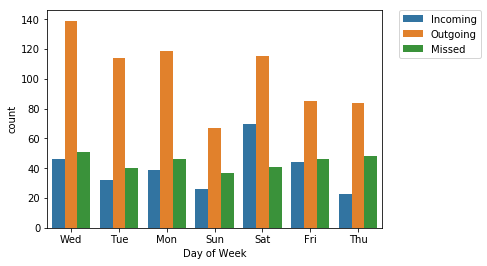

In [59]:
sns.countplot(x='Day of Week',data=df,hue='Call Type')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

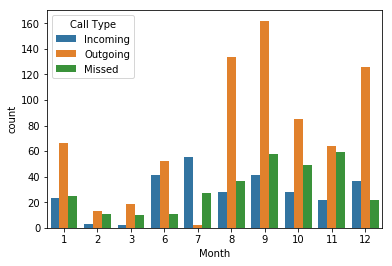

In [54]:
sns.countplot(x='Month',data=df,hue='Call Type')

In [64]:
dayHour=df.groupby(by=['Day of Week','Hour']).count()['Call Type'].unstack()

In [68]:
dayHour

Hour,0,1,3,6,7,8,9,10,11,12,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1.0,NaN,NaN,2.0,NaN,2.0,22.0,10.0,7.0,5.0,...,10.0,6.0,6.0,20.0,18.0,14.0,17.0,19.0,4.0,5.0
Mon,1.0,NaN,NaN,8.0,20.0,3.0,10.0,8.0,12.0,18.0,...,7.0,5.0,18.0,12.0,12.0,9.0,8.0,7.0,5.0,36.0
Sat,6.0,2.0,NaN,1.0,9.0,9.0,11.0,14.0,14.0,16.0,...,13.0,14.0,23.0,15.0,8.0,11.0,1.0,6.0,9.0,20.0
Sun,3.0,NaN,NaN,2.0,NaN,4.0,16.0,7.0,14.0,9.0,...,2.0,7.0,5.0,7.0,6.0,3.0,5.0,4.0,3.0,21.0
Thu,1.0,NaN,NaN,NaN,2.0,2.0,8.0,3.0,10.0,16.0,...,7.0,10.0,1.0,14.0,8.0,22.0,4.0,15.0,NaN,6.0
Tue,NaN,NaN,NaN,NaN,NaN,4.0,14.0,9.0,16.0,44.0,...,12.0,7.0,11.0,16.0,8.0,5.0,4.0,9.0,5.0,3.0
Wed,1.0,NaN,2.0,NaN,5.0,7.0,7.0,6.0,12.0,24.0,...,22.0,15.0,7.0,14.0,22.0,19.0,16.0,3.0,12.0,1.0


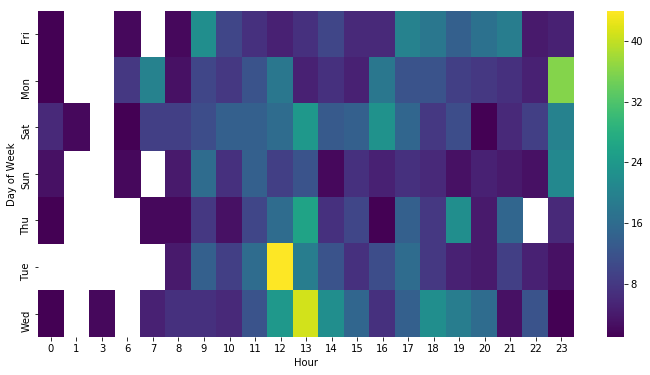

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [69]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Call Type'].unstack()
dayMonth.head()

Month,1,2,3,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,
Fri,12.0,1.0,3.0,6.0,10.0,42.0,38.0,18.0,25.0,20.0
Mon,13.0,2.0,2.0,20.0,13.0,30.0,21.0,33.0,53.0,17.0
Sat,10.0,9.0,NaN,18.0,14.0,6.0,73.0,38.0,20.0,38.0
Sun,16.0,2.0,NaN,15.0,14.0,20.0,31.0,12.0,5.0,15.0
Thu,8.0,NaN,15.0,8.0,12.0,33.0,22.0,19.0,14.0,24.0


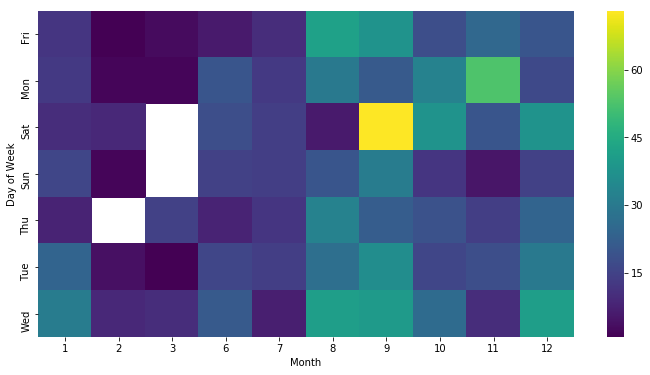

In [71]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')